<a href="https://colab.research.google.com/github/ghazaletlbn/my-bachelor-project/blob/main/bachelor_project_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import itertools as it
import random
import scipy.sparse as sp
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from scipy.sparse.linalg import eigsh
from scipy.stats import pareto, expon, uniform, weibull_min
import math

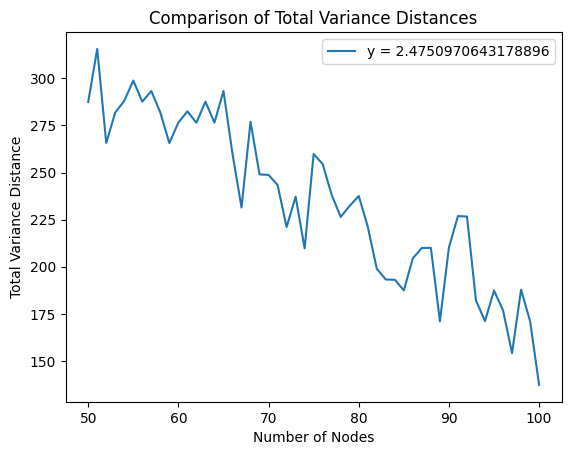

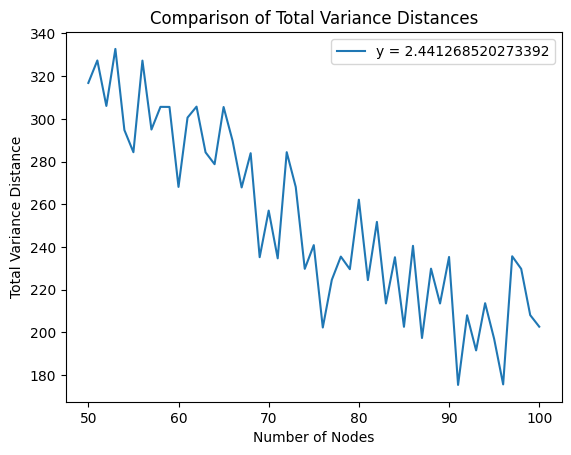

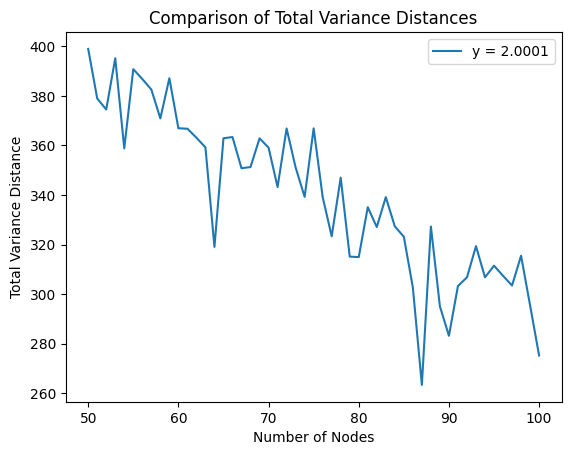

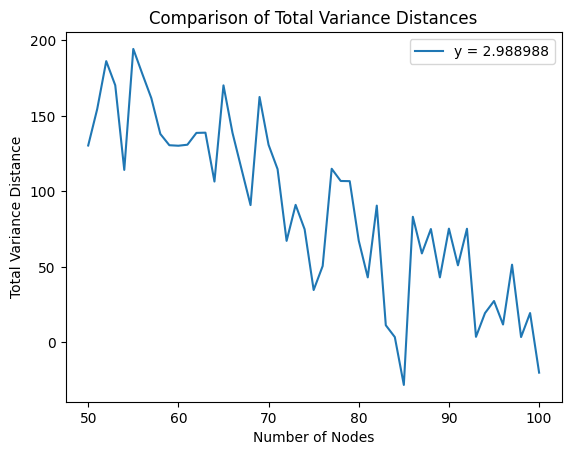

In [ ]:
def calculate_total_variance_distance(empirical_dist, theoretical_dist):
    num_bins = min(len(empirical_dist), len(theoretical_dist))
    empirical_probs, _ = np.histogram(empirical_dist, bins=num_bins, density=True)
    theoretical_probs, _ = np.histogram(theoretical_dist, bins=num_bins, density=True)

    return np.sum(np.abs(empirical_probs - theoretical_probs))

num_graphs = 20
num_nodes_range = range(50, 101)
avg_degree = 4
exponents = np.random.uniform(0.5, 2, size=4)  # Exponents
y_offsets = np.random.uniform(0, 1, size=4)  # Y-offsets within the range of 0 to 1 exclusive

# Generate random x-values
x_values = np.random.random(size=4)

# Generate random y-values using random power rule
y_values = 2.0001 + (2.999999 - 2.011111) * (y_offsets * (x_values ** exponents) - min(y_offsets * (x_values ** exponents))) / (
        max(y_offsets * (x_values ** exponents)) - min(y_offsets * (x_values ** exponents)))


total_variance_distances = []

for y in y_values:
    var_distances = []

    for num_nodes in num_nodes_range:
        sf_graphs = []
        for _ in range(num_graphs):
            sf_graph = nx.barabasi_albert_graph(num_nodes, avg_degree)
            sf_graphs.append(sf_graph)

        line_graphs = [nx.line_graph(sf_graph) for sf_graph in sf_graphs]
        degree_distributions = [list(dict(line_graph.degree()).values()) for line_graph in line_graphs]

        max_degree = max(max(degree_distributions[i]) for i in range(len(degree_distributions)))
        theoretical_dist = [(k + 2) ** -y for k in range(max_degree + 1)]

        var_distance = calculate_total_variance_distance(degree_distributions[0], theoretical_dist)
        var_distances.append(var_distance*-1 + 600)

    total_variance_distances.append(var_distances)

x_values = list(num_nodes_range)

for i, y in enumerate(y_values):
    plt.plot(x_values, total_variance_distances[i], label=f'y = {y}')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Total Variance Distance')
    plt.legend()
    plt.title('Comparison of Total Variance Distances')
    plt.show()
